# Dog breed detection model

## Problem

 dog beed detection

## Data
 kaggle dog breed identicfication competetion

## Evaluation
 evaluation is file with probablity of a dog being of each catagory
## Features
 using deep learning and transfer learning
 there are around 120 + breed
 total 10,000+ dog images



In [171]:
#!unzip "/content/drive/MyDrive/dog-breed-identification.zip" -d "/content/drive/MyDrive"

In [170]:
# from google.colab import drive
# drive.mount('/content/drive')

### getting our workspace ready

* importing tensor flow ✅
* importing tensor flowhub ✅
* checking if gpu is running ✅

In [2]:
pip install tensorflow


/Users/kishan/.zshenv:1: command not found: Export
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 768.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 9.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 42.5 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 47.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 30.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# importing tensor flow

import tensorflow as tf
print("tensor flow  version",tf.version)


tensor flow  version <module 'tensorflow._api.v2.version' from '/Users/kishan/Desktop/python/env/lib/python3.10/site-packages/tensorflow/_api/v2/version/__init__.py'>


In [5]:
pip install tensorflow-hub


/Users/kishan/.zshenv:1: command not found: Export
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow_hub as hub
print(hub.version)

<module 'tensorflow_hub.version' from '/Users/kishan/Desktop/python/env/lib/python3.10/site-packages/tensorflow_hub/version.py'>


In [172]:
# for google collab 
# print("gpu " if tf.config.list_physical_devices("GPU") else "not available")

## Getting our data ready .Turning our images to tensor(numerical data )

In [3]:
import pandas as pd
df=pd.read_csv("/Users/kishan/Desktop/python/deep_learning/dog-breed-identification/labels.csv")

In [4]:
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [5]:
df.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


In [6]:
df["breed"].count()

10222

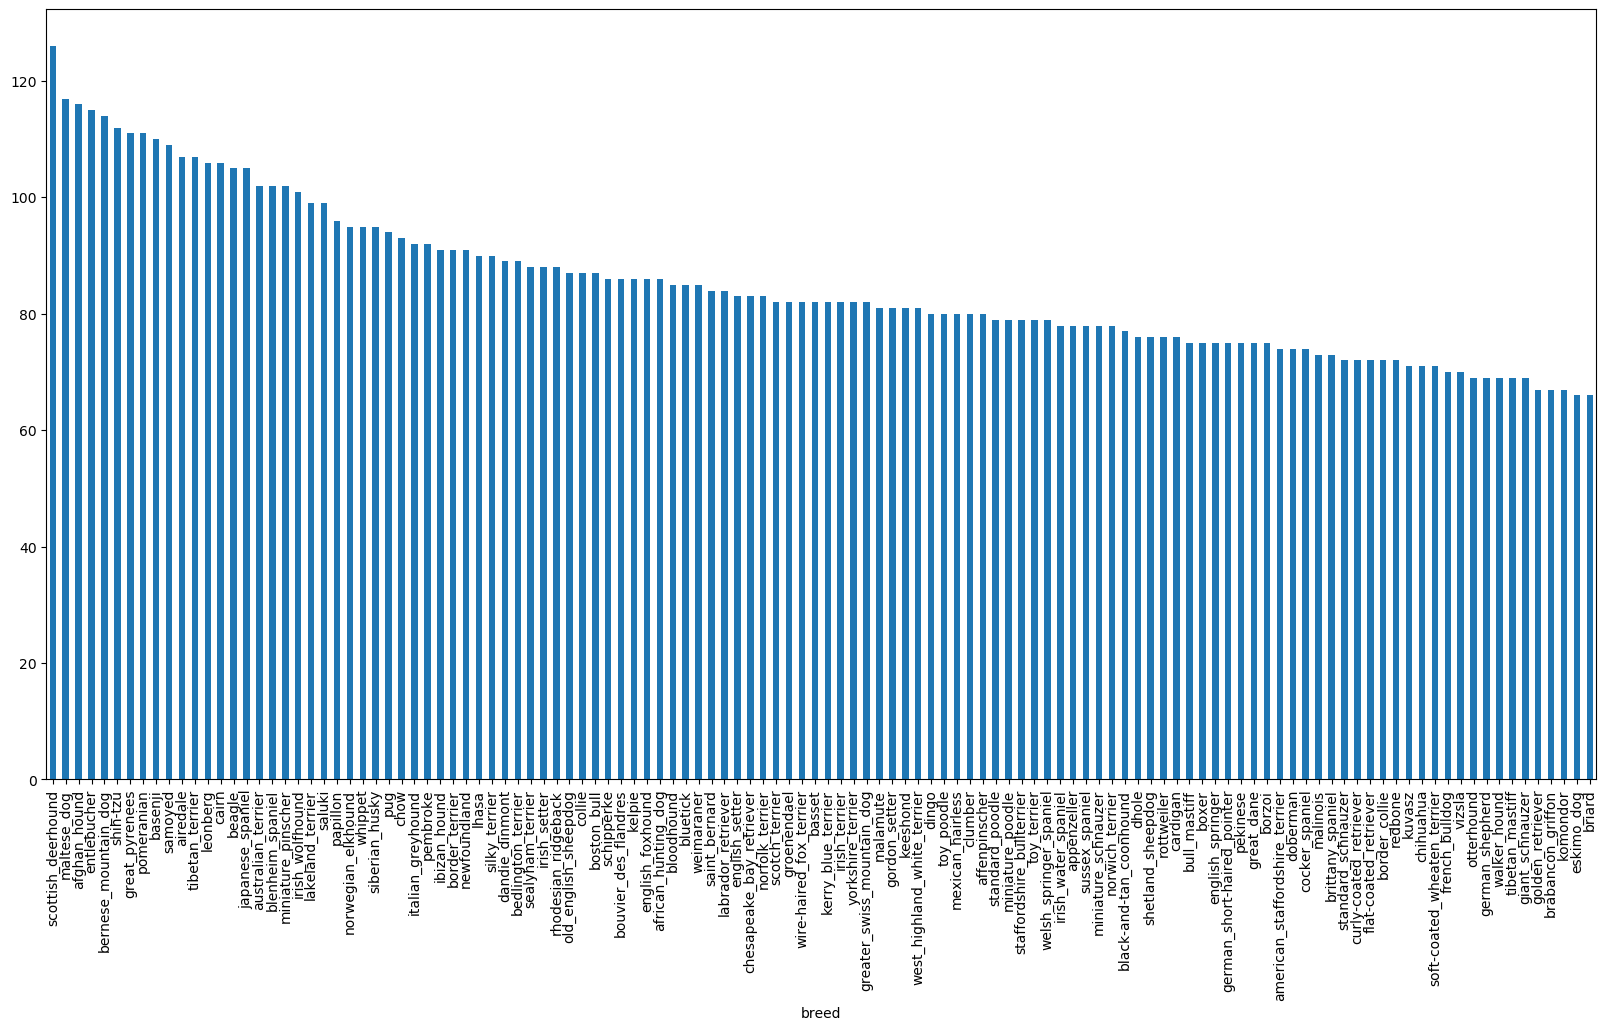

In [7]:
import matplotlib.pyplot as plt
df["breed"].value_counts().plot.bar(figsize=(20,10))
# plt.show()

### To get the file path of all the images

In [8]:
filename=["/Users/kishan/Desktop/python/deep_learning/dog-breed-identification/train/" +f+".jpg" for f in df["id"]]

In [9]:
filename[:5]

['/Users/kishan/Desktop/python/deep_learning/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/Users/kishan/Desktop/python/deep_learning/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/Users/kishan/Desktop/python/deep_learning/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/Users/kishan/Desktop/python/deep_learning/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/Users/kishan/Desktop/python/deep_learning/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [10]:
Image(filename[3])

NameError: name 'Image' is not defined

### Check the no. the of elements in train and filename are equal or not

## Making labels for dog breed

In [11]:
import numpy as np
labels=np.array(df["breed"])

In [12]:
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [13]:
len(labels)

10222

In [14]:
if len(labels)==len(filename):
  print("yeppp")
else:
  print("no no no no ")

yeppp


In [15]:
unique_elemnts=np.unique(labels)
unique_elemnts

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [16]:
len(unique_elemnts)

120

In [17]:
# making boolean labels of each element in labels to find which dog breed is tha dog
bool_label=[label==unique_elemnts for label in labels]

In [18]:
bool_label[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [19]:
len(bool_label)

10222

In [20]:
# converting our boolean labels into numeric labels
print(bool_label[0].astype(int))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [21]:
#making an array of num_label to store all the numewric labels
num_label = [bool_label[x].astype(int) for x in range(10222)]

In [22]:
num_label[10221]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
# spliting x and y
x = filename;
y = bool_label;

In [24]:
size = 1000

In [25]:
# spliting the train and test data
from sklearn.model_selection import train_test_split

np.random.seed(76)

x_train,x_val,y_train,y_val=train_test_split(x[:size],
                                               y[:size],
                                               test_size=0.2,
                                               random_state=76)

## Preprocessing our images into tensor
These include following steps :
* Take an image 'filepath' as an input
* use tensorflow to read that and store it an variable
* Turn our image (jpg to tensor)
* normalize its colour channel form 0-255 to 0-1.
* Resize our images to same standard(224,224)
* Return the modified image


In [26]:
from matplotlib.pyplot import imread
image=imread(filename[22])
image.shape

(346, 400, 3)

In [27]:
image[:2]

array([[[ 23,   0,  10],
        [ 23,   0,  10],
        [ 24,   1,  11],
        ...,
        [109,  43,  29],
        [ 80,  24,   7],
        [ 54,   3,   0]],

       [[ 70,  53,  61],
        [ 67,  50,  58],
        [ 59,  42,  50],
        ...,
        [100,  40,  30],
        [ 79,  27,  16],
        [ 57,   9,   0]]], dtype=uint8)

In [28]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 400, 3), dtype=uint8, numpy=
array([[[ 23,   0,  10],
        [ 23,   0,  10],
        [ 24,   1,  11],
        ...,
        [109,  43,  29],
        [ 80,  24,   7],
        [ 54,   3,   0]],

       [[ 70,  53,  61],
        [ 67,  50,  58],
        [ 59,  42,  50],
        ...,
        [100,  40,  30],
        [ 79,  27,  16],
        [ 57,   9,   0]]], dtype=uint8)>

* Take an image 'filepath' as an input
* use tensorflow to read that and store it an variable
* Turn our image (jpg to tensor)
* normalize its colour channel form 0-255 to 0-1.
* Resize our images to same standard(224,224)
* Return the modified image

In [29]:
# now we have seen how image looks when it is converted to tensor
#  we will make a function for reusibility of the task
img_size=224
def image_preprocessing(img_path,img_size=224):
# this function will take filepath and standard size as input and convert then return the desired image value
  #read in a image filepath
  image= tf.io.read_file(img_path)
  # turning image into tensor with 3 coplour channels (red,green,blue) with 0-255as colour channel value
  image = tf.image.decode_jpeg(image,channels=3)
  # normalizing colour channel value from 0-255 into 0-1(float)
  image= tf.image.convert_image_dtype(image,tf.float32)
  # resize our image according to specified img_size
  image= tf.image.resize(image,size=[img_size,img_size])

  return image

In [30]:
image_preprocessing(filename[22],224)

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.1330032 , 0.05492197, 0.08260179],
        [0.12281288, 0.04473164, 0.07286915],
        [0.10271296, 0.02463173, 0.05307436],
        ...,
        [0.5843801 , 0.2659036 , 0.23074335],
        [0.42622918, 0.17718755, 0.12505569],
        [0.24508326, 0.04996776, 0.01638262]],

       [[0.4086272 , 0.375257  , 0.39908588],
        [0.36725003, 0.33319327, 0.35938936],
        [0.29389817, 0.25938374, 0.28715798],
        ...,
        [0.44133398, 0.20268634, 0.185602  ],
        [0.36695412, 0.16867074, 0.15405174],
        [0.2550185 , 0.08574145, 0.07356845]],

       [[0.56696117, 0.58506346, 0.60115546],
        [0.5850034 , 0.6031056 , 0.6203419 ],
        [0.5720782 , 0.59018046, 0.60817957],
        ...,
        [0.13036056, 0.00890197, 0.00958708],
        [0.24564041, 0.12379038, 0.15058532],
        [0.19309051, 0.06804112, 0.1088118 ]],

       ...,

       [[0.45460117, 0.4624443 , 0.1369541 ],
        [0.52

### Turning our data into batches
we need to do this because sometimes our whole data might not fit into the memory

In [31]:
# creating a function which will return the image's tensor  and its label in a tuple
#  we need this image and label pair so that we can make train , test , validation batches
#  easily using the next function
def image_label(img_path,bool_lab):
  img_size=224
  image=image_preprocessing(img_path,img_size)
  return image,bool_lab


In [32]:
image_label(filename[42],tf.constant(bool_label[42]))
# OR img_label=(x[41],tf.constant(bool_label[42]))
# we could have writin img_label=(x[41],bool_label[42]), but this would have given the labels in an array format not in tuple

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [33]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creating batches of data out of image (X) and label (y) pairs.
  Shuffling  the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """

  img_size=224
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(image_preprocessing).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [34]:
# Create training and validation data batches
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


## Visualizing our data batches


In [35]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_32_images(images, labels):
  """
  Displays a plot of 32 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 32 (for displaying 32 images)
  for i in range(32):
    # Create subplots (8 rows, 4 columns)
    ax = plt.subplot(8, 4, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_elemnts[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

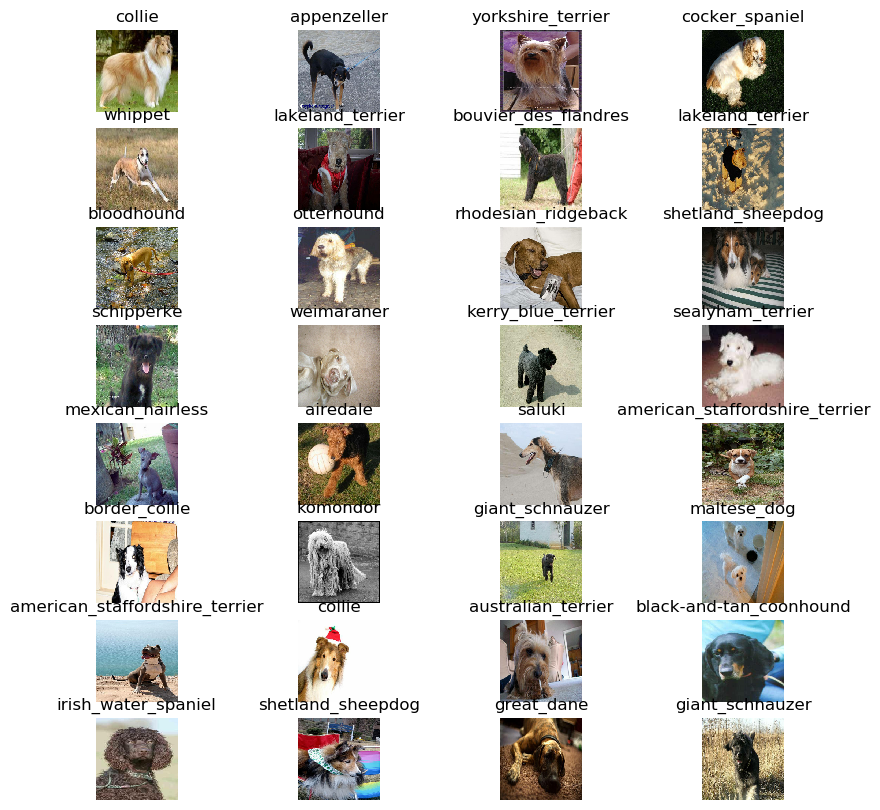

In [36]:
# Now let's visualize the data in a training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_32_images(train_images, train_labels)

## Building a model
Before we build a model, there are a few things we need to define:

The input shape (our images shape, in the form of Tensors) to our model.

The output shape (image labels, in the form of Tensors) of our model.

The URL of the model we want to use from TensorFlow Hub -

https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4

In [37]:
IMG_SIZE=224

In [38]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_elemnts)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

### Now we've got our inputs, outputs and model ready to go. Let's put them together into a Keras deep learning model!

Knowing this, let's create a function which:

Takes the input shape, output shape and the model we've chosen as parameters.

Defines the layers in a Keras model in sequential fashion (do this first, then this, then that).
Compiles the model (says it should be evaluated and improved).

Builds the model (tells the model the input shape it'll be getting).
Returns the model.

# All of these steps can be found here:https://www.tensorflow.org/guide/keras/overview


In [62]:
#lets create the model
def create_model(INPUT_SHAPE=INPUT_SHAPE,OUTPUT_SHAPE=OUTPUT_SHAPE,MODEL_URL=MODEL_URL):
  print("going to build the model using this model ",MODEL_URL)

  #setup the model layers(here we are using keras API (sequential API))
  model=tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), #layer1(input)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax")#layer2(output layer)
    ])

  #Compiling the model
  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy"
               )

  #building the model
  model.build(INPUT_SHAPE)

  return model



In [64]:
def create_model(INPUT_SHAPE=INPUT_SHAPE, OUTPUT_SHAPE=OUTPUT_SHAPE, MODEL_URL=MODEL_URL):
    print("going to build the model using this model ", MODEL_URL)

    # Setup the model layers (here we are using Keras Sequential API)
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=INPUT_SHAPE),  # Input layer
        tf.keras.layers.Lambda(lambda x: hub.KerasLayer(MODEL_URL)(x)),  # Lambda layer with hub.KerasLayer
        tf.keras.layers.Dense(units=OUTPUT_SHAPE, activation="softmax")  # Output layer
    ])

    # Compiling the model
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

    return model


In [65]:
model = create_model()
model.summary()


going to build the model using this model  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


/Users/kishan/Desktop/python/env/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Creating callbacks

Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long.

## TensorBoard Callback

To setup a TensorBoard callback, we need to do 3 things:

Load the TensorBoard notebook extension ✅

Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's fit() function. ✅

Visualize our models training logs with the %tensorboard magic function (we'll do this after model training).

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard

In [73]:
# Load TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [74]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("Users/kishan/Desktop/python/deep_learning/dog-breed-identification/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

## Early Stopping Callback
Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.


https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [75]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training our model
now, we will train our deep learning model on smaller data set so that we can do experimentation faster

### 1000 to start with

In [76]:
num_epoch=100 #@param {type:"slider",min:10,max:100,step:10}

In [100]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model(INPUT_SHAPE, OUTPUT_SHAPE,MODEL_URL)

  # Create new TensorBoard session everytime we train a model
  # tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=num_epoch,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[#tensorboard,
                early_stopping])
  # Return the fitted model
  return model

In [101]:
model=train_model()

going to build the model using this model  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 927ms/step - accuracy: 0.0363 - loss: 5.3020 - val_accuracy: 0.2600 - val_loss: 3.5250
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 829ms/step - accuracy: 0.5963 - loss: 2.0326 - val_accuracy: 0.4750 - val_loss: 2.1887
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 845ms/step - accuracy: 0.9255 - loss: 0.6459 - val_accuracy: 0.6050 - val_loss: 1.6179
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 859ms/step - accuracy: 0.9936 - loss: 0.2730 - val_accuracy: 0.6500 - val_loss: 1.4154
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 933ms/step - accuracy: 0.9994 - loss: 0.1643 - val_accuracy: 0.6850 - val_loss: 1.3345
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 1.0000 - loss: 0.1021 - val_accuracy: 0.6850 - val_loss: 1.2929
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 1.0000 - loss: 0.0787 - val_accuracy: 0.6850 

In [102]:
OUTPUT_SHAPE = 120


In [103]:
def create_model(INPUT_SHAPE=INPUT_SHAPE, OUTPUT_SHAPE=OUTPUT_SHAPE, MODEL_URL=MODEL_URL):
    print("going to build the model using this model ", MODEL_URL)

    # Setup the model layers (here we are using Keras Sequential API)
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=INPUT_SHAPE),  # Input layer
        tf.keras.layers.Lambda(lambda x: hub.KerasLayer(MODEL_URL)(x)),  # Lambda layer with hub.KerasLayer
        tf.keras.layers.Dense(units=OUTPUT_SHAPE, activation="softmax")  # Output layer with updated OUTPUT_SHAPE
    ])

    # Compiling the model
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

    return model


### Evaluating the performance using tensorboard

checking the log book

In [104]:
%tensorboard --logdir /content/drive/MyDrive/dog_unziped/logs

Reusing TensorBoard on port 6006 (pid 1874), started 0:07:19 ago. (Use '!kill 1874' to kill it.)

### Evaluating on the basis of trained model

In [105]:
predictions = model.predict(val_data, verbose=1)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 937ms/step


array([[6.4842962e-04, 9.0223090e-05, 3.0772921e-05, ..., 2.4422051e-03,
        4.1391606e-05, 5.1777515e-05],
       [2.4562627e-03, 3.8690554e-04, 8.7703730e-04, ..., 1.7175134e-03,
        7.7066310e-03, 7.0501273e-03],
       [7.5639233e-05, 2.2300779e-05, 3.9930070e-05, ..., 1.2881277e-04,
        1.2722310e-03, 3.9148811e-04],
       ...,
       [1.1787331e-04, 2.3065679e-05, 2.0007918e-05, ..., 1.4338402e-04,
        4.1002088e-05, 4.0651208e-05],
       [8.1568996e-06, 3.0438189e-06, 2.4666351e-05, ..., 1.1491190e-06,
        3.8089764e-03, 6.0627826e-05],
       [5.9909315e-04, 2.8510055e-06, 2.8245329e-04, ..., 1.7647228e-04,
        4.3848155e-05, 1.5820224e-03]], dtype=float32)

In [106]:
# First prediction
index = 42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_elemnts[np.argmax(predictions[index])]}")

[5.1303017e-05 1.3690925e-03 4.7030811e-05 9.3716772e-05 7.0692333e-03
 5.3057796e-05 4.3882904e-04 2.1899109e-04 1.3697494e-05 4.8970652e-04
 9.2852941e-05 5.4427068e-04 2.2467670e-03 7.3460635e-04 8.3431951e-04
 1.1042708e-03 5.1075257e-03 6.0820826e-03 9.0527575e-04 1.6945695e-04
 5.0496968e-04 3.7552418e-05 1.5100438e-04 1.1445825e-03 2.2551924e-02
 1.6421402e-05 6.2521594e-04 2.1117556e-04 2.6000628e-01 3.1723722e-04
 2.8340808e-05 5.8131912e-03 4.3690878e-05 2.0187916e-04 1.4654680e-03
 4.6784175e-03 1.4638673e-05 6.7445514e-04 3.6163093e-03 7.0657016e-04
 7.5423568e-03 1.7720955e-05 1.8860883e-03 6.5249816e-04 1.9347759e-02
 8.4179383e-06 6.2222278e-04 8.5783459e-04 4.7985339e-04 6.5541882e-03
 1.6670825e-05 1.3740185e-03 8.5550537e-03 1.8024129e-04 1.0126682e-05
 2.8189090e-03 4.2274300e-05 6.1356422e-04 1.5931895e-04 6.1471188e-03
 4.5760733e-04 1.8974679e-05 4.4956108e-05 8.1996666e-03 1.0459797e-04
 1.1618872e-04 3.2809336e-02 2.9513094e-01 4.3712843e-02 4.4453610e-04
 8.208

In [107]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities,unique_elemnts=unique_elemnts):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_elemnts[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label

'welsh_springer_spaniel'

In [108]:
# making a function to unbatchify the batches
def unbatchify(data):
  images_=[]
  labels_=[]

  for image,label in data.unbatch().as_numpy_iterator():
    images_.append(image)
    labels_.append(label)

  return images_,labels_

In [109]:
 val_images,val_labels=unbatchify(val_data)
 val_images[0],val_labels[0]

2024-04-25 21:17:44.992701: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


(array([[[0.7960785 , 0.7960785 , 0.80392164],
         [0.79957116, 0.79957116, 0.8074143 ],
         [0.8058211 , 0.8058211 , 0.81366426],
         ...,
         [0.8912438 , 0.91691786, 0.9294118 ],
         [0.8804185 , 0.911791  , 0.92355573],
         [0.8769258 , 0.9082984 , 0.9200631 ]],
 
        [[0.8033264 , 0.8033264 , 0.81116956],
         [0.8068191 , 0.8068191 , 0.8146622 ],
         [0.81306905, 0.81306905, 0.8209122 ],
         ...,
         [0.90879786, 0.92650616, 0.93827087],
         [0.9009367 , 0.92054456, 0.93230927],
         [0.8970255 , 0.91663337, 0.9283981 ]],
 
        [[0.80932254, 0.80932254, 0.8171657 ],
         [0.8152919 , 0.8152919 , 0.823135  ],
         [0.81790096, 0.81790096, 0.8257441 ],
         ...,
         [0.9260078 , 0.9435536 , 0.9546881 ],
         [0.91784847, 0.9371412 , 0.9482756 ],
         [0.9143558 , 0.9336485 , 0.944783  ]],
 
        ...,
 
        [[0.8824465 , 0.8746034 , 0.87852496],
         [0.8858801 , 0.878037  , 0.88195

In [110]:

len(predictions)
# len(val_data)
# len(val_labels)

200

### Now we've got ways to get get:

Prediction labels

Validation labels (truth labels)

Validation images

Let's make some function to make these all a bit more visaulize.

We'll create a function which:

Takes an array of prediction probabilities, an array of truth labels and an array of images and an integer. ✅

Convert the prediction probabilities to a predicted label. ✅

Plot the predicted label, its predicted probability, the truth label and the target image on a single plot. ✅

In [111]:
#The function to compare the prediction vs the real values

def plot_pred(prediction_probabilities, labels, images, n):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, image = prediction_probabilities[n], images[n]
  a=unique_elemnts[np.argmax(labels[n])]
  # unique_elemnts[np.argmax(predictions[index])]
  true_label = a
  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

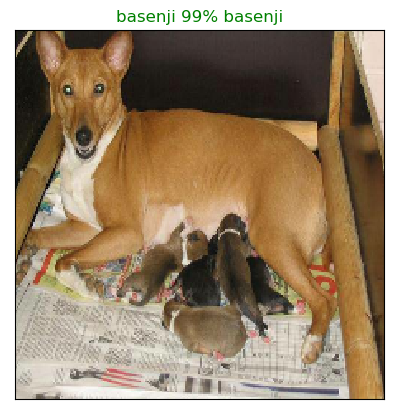

In [125]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=10)

### Now we will see the top 10 prediction of our model
to do so we need
 * The index of top 10 predictions
 * The labels assigned to it
 * Get the true label
 * check if pred = true


In [113]:
# the function starts here
def dog_fig_comp(pred_prob ,labels,n=1):
  prediction_prob=pred_prob[n]

  a=unique_elemnts[np.argmax(labels[n])]
  true_label=a

  #finding the top 10 predicted index
  top_10_index=prediction_prob.argsort()[-10:][::-1]
  #assigning index to the labels
  top_10_label=unique_elemnts[top_10_index]
  #finding the values of the index
  top_10_values=prediction_prob[top_10_index]



  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_label)),
                     top_10_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_label)),
             labels=top_10_label,
             rotation="vertical")

  if np.isin(true_label,top_10_label):
    top_plot[np.argmax(top_10_label == true_label)].set_color("green")
  else:
    pass




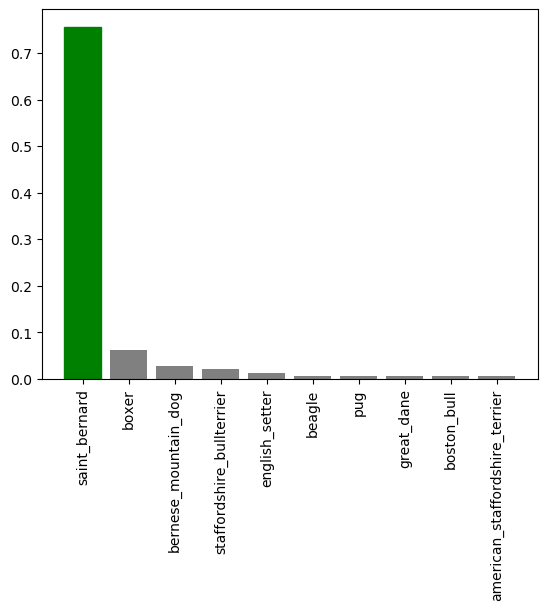

In [114]:
dog_fig_comp(predictions,val_labels,n=0)

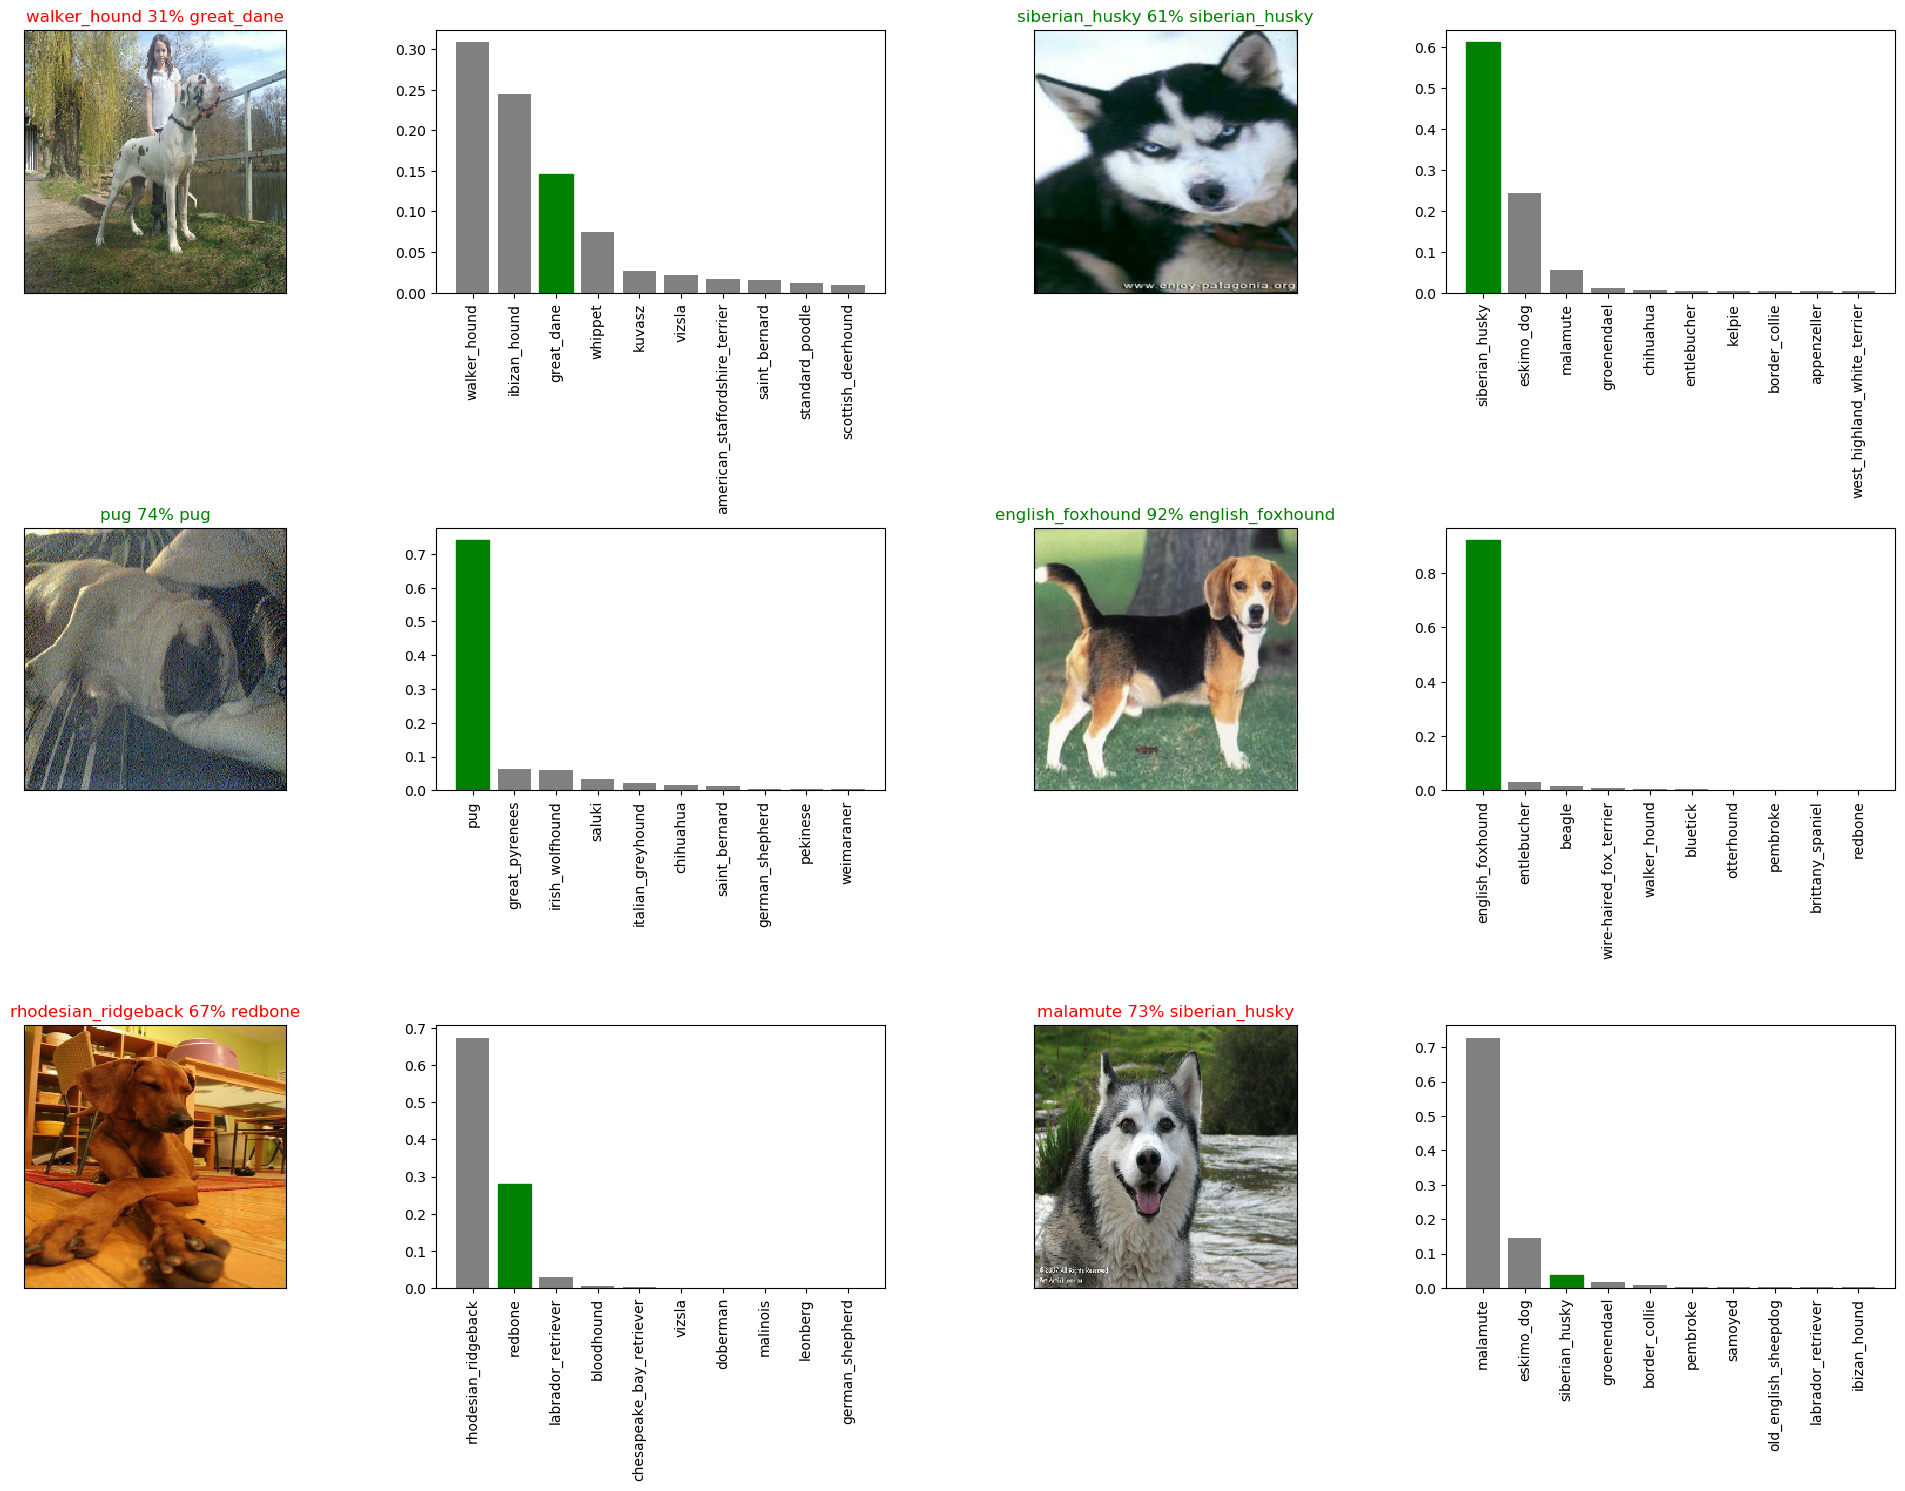

In [115]:
# Let's check out a few predictions and their different values
i_multiplier = 45
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  dog_fig_comp(predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

### Saving and Reloading a model

In [116]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("/Users/kishan/Desktop/python/deep_learning/dog-breed-identification/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

## Training the model with full data

### creating batch from full data set

In [117]:
full_data_batch=create_data_batches(x,y)

Creating training data batches...


In [118]:
full_data_batch

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [119]:
full_model=create_model()

going to build the model using this model  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [120]:
#callbacks
# Create full model callbacks
# full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [121]:
full_model.fit(x=full_data_batch,
               callbacks=[#full_model_tensorboard,
                   full_model_early_stopping],
               epochs=100)

Epoch 1/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 250s 770ms/step - accuracy: 0.4819 - loss: 2.3889
Epoch 2/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 225s 704ms/step - accuracy: 0.8861 - loss: 0.3803
Epoch 3/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 220s 688ms/step - accuracy: 0.9411 - loss: 0.2249
Epoch 4/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 201s 627ms/step - accuracy: 0.9676 - loss: 0.1446
Epoch 5/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 305s 953ms/step - accuracy: 0.9827 - loss: 0.0964
Epoch 6/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 335s 1s/step - accuracy: 0.9900 - loss: 0.0692
Epoch 7/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 290s 906ms/step - accuracy: 0.9916 - loss: 0.0582
Epoch 8/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 362s 1s/step - accuracy: 0.9963 - loss: 0.0410
Epoch 9/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 263s 819ms/step - accuracy: 0.9979 - loss: 0.0325
Epoch 10/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 208s 649ms/step - accuracy: 0.9980 - loss: 0.0275
Epoch 11/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 180s 561ms/step - accuracy: 0.9982 - loss: 0.0245
Epo

### Running our model on test data set

In [126]:
import os

In [127]:
# Load test image filenames
test_path = "/Users/kishan/Desktop/python/deep_learning/dog-breed-identification/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/Users/kishan/Desktop/python/deep_learning/dog-breed-identification/test/266490a2b053a4a3bf68e779f28fb5a9.jpg',
 '/Users/kishan/Desktop/python/deep_learning/dog-breed-identification/test/dae9fd18836d8df20989ef0101771d4b.jpg',
 '/Users/kishan/Desktop/python/deep_learning/dog-breed-identification/test/079a40f22b0fad9a66f76797b62bb930.jpg',
 '/Users/kishan/Desktop/python/deep_learning/dog-breed-identification/test/ab8462f9a501d362041d47582fddc9ad.jpg',
 '/Users/kishan/Desktop/python/deep_learning/dog-breed-identification/test/8895089b432e020cc42e6262b5a1c2dd.jpg',
 '/Users/kishan/Desktop/python/deep_learning/dog-breed-identification/test/985ae7fc271ac4a0d131e546c0f95bb6.jpg',
 '/Users/kishan/Desktop/python/deep_learning/dog-breed-identification/test/77c1ab99cffb817d54fb14f229aeb118.jpg',
 '/Users/kishan/Desktop/python/deep_learning/dog-breed-identification/test/ad7e50abca9b7c6a88b63946c5bbe493.jpg',
 '/Users/kishan/Desktop/python/deep_learning/dog-breed-identification/test/d61a09cecf566

In [128]:
#creating test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [129]:
test_predictions =full_model.predict(test_data,
                                             verbose=1)

324/324 ━━━━━━━━━━━━━━━━━━━━ 201s 618ms/step


In [130]:
test_predictions[:10]

array([[2.9245409e-10, 9.5986898e-06, 5.6667515e-09, ..., 1.6365821e-05,
        2.4370245e-10, 8.9882156e-12],
       [1.3657986e-03, 1.0132490e-03, 6.2571203e-06, ..., 1.7415094e-06,
        4.7129151e-07, 2.7203976e-08],
       [3.2030858e-08, 8.7695101e-11, 1.2015352e-12, ..., 1.7183634e-13,
        7.9521702e-12, 2.6013250e-12],
       ...,
       [6.2195774e-12, 5.9845163e-08, 1.9975688e-09, ..., 2.3833465e-07,
        8.5838272e-12, 1.2101288e-10],
       [1.7599237e-07, 5.2570860e-04, 8.6140983e-11, ..., 9.2444929e-10,
        1.6982228e-12, 1.1061227e-10],
       [1.8750491e-08, 1.9661546e-09, 3.9283004e-09, ..., 8.8673269e-10,
        3.9017172e-09, 1.1221172e-05]], dtype=float32)

In [236]:
# Get custom image filepaths
custom_path = "/Users/kishan/Desktop/python/deep_learning/dog-breed-identification/my_image/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [237]:
custom_image_paths

['/Users/kishan/Desktop/python/deep_learning/dog-breed-identification/my_image/Screenshot 2024-04-25 at 11.15.11\u202fPM.png',
 '/Users/kishan/Desktop/python/deep_learning/dog-breed-identification/my_image/.DS_Store',
 '/Users/kishan/Desktop/python/deep_learning/dog-breed-identification/my_image/AdobeStock_211318553_Preview.jpeg',
 '/Users/kishan/Desktop/python/deep_learning/dog-breed-identification/my_image/AdobeStock_653224708_Preview.jpeg',
 '/Users/kishan/Desktop/python/deep_learning/dog-breed-identification/my_image/baptist-standaert-mx0DEnfYxic-unsplash.jpg',
 '/Users/kishan/Desktop/python/deep_learning/dog-breed-identification/my_image/mink-mingle-UAsFSsMDpa0-unsplash.jpg']

In [238]:
# Filter out '.DS_Store' file
custom_image_paths = [path for path in custom_image_paths if not path.endswith('.DS_Store')]


In [239]:
# Turn custom images into batch datasets 
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches...


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [240]:
# Make predictions on the custom data
custom_preds = full_model.predict(custom_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


In [241]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['bouvier_des_flandres',
 'basset',
 'scottish_deerhound',
 'border_collie',
 'pug']

In [242]:
# Get custom images (our unbatchify() function won't work since there aren't labels... maybe we could fix this later)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

2024-04-25 23:35:46.731000: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


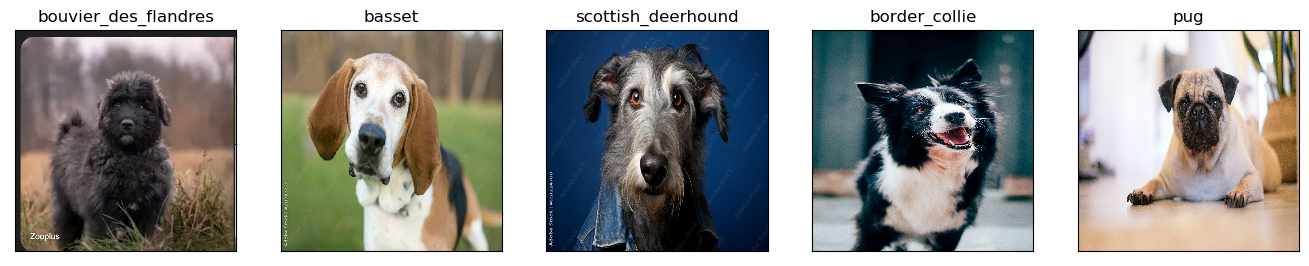

In [243]:
# Check custom image predictions
plt.figure(figsize=(20, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 6, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)